# seaborn

## 설정

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

# Jupyter Notebook에서 그래프를 바로 볼 수 있도록 설정
import matplotlib.pyplot as plt
%matplotlib inline

# 경고 메시지 무시 설정
import warnings
warnings.filterwarnings(action="ignore")

import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin': # 맥OS
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # 윈도우
    path = "c:/Windows/Fonts/H2GTRM.TTF"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')

## styling

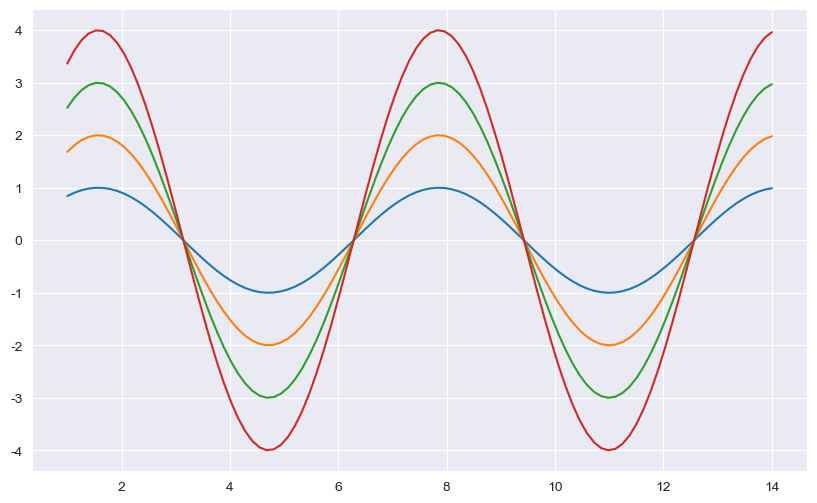

In [ ]:
import seaborn as sns

x = np.linspace(1, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x)
y3 = 3 * np.sin(x)
y4 = 4 * np.sin(x)

sns.set_style("darkgrid") # darkgrid(default), whitegrid, dark, white, ticks
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

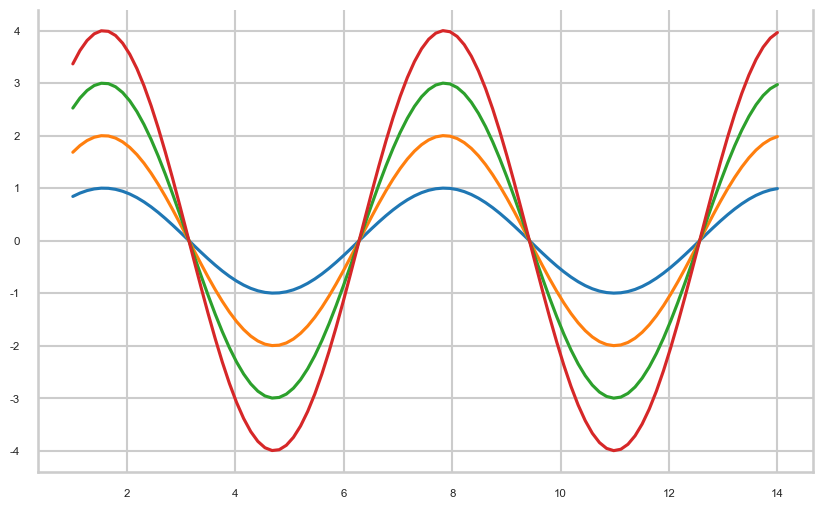

In [39]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine(right=False, left=False) # default (top=True, bottom=False) 
plt.show()

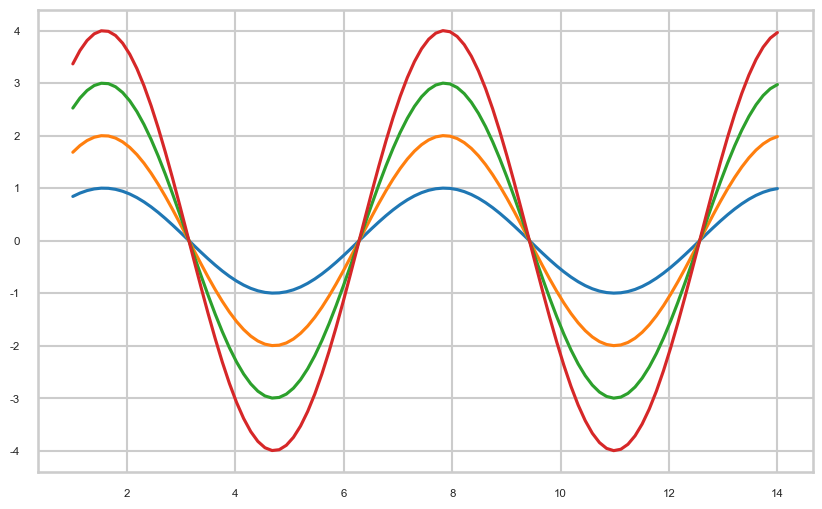

In [ ]:
sns.set_context("talk", font_scale=.5) # notebook(default), paper, talk, poster
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

## seaborn의 기본 dataset : tips 활용

In [42]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plot
- Distribution Plot은 데이터의 분포를 시각화하는데 도움이 됨
- 이 그래프를 사용하여 데이터의 평균(mean), 중위수(median), 범위(range), 분산(variance), 편차(deviation) 등을 이해

### Hist Plot
- 변수에 대한 히스토그램을 표시
- 하나 혹은 두 개의 변수 분포를 나타내는 전형적인 시각화 도구로 범위에 포함되는 관측수를 세어 표시

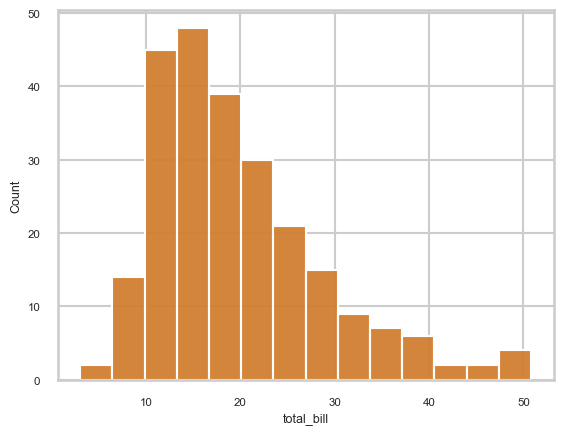

In [44]:
sns.histplot(x=tips["total_bill"])
plt.show()

### KDE Plot
- 하나 혹은 두 개의 변수에 대한 분포를 그림
- histplot은 절대량이라면 kdeplot은 밀도 추정치를 시각화
- 결과물로는 연속된 곡선의 그래프를 얻을 수 있음

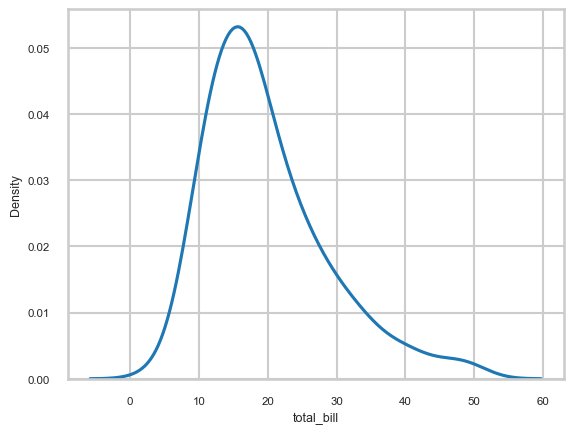

In [45]:
sns.kdeplot(x=tips['total_bill'])
plt.show()

### Box Plot
- 최대(maximum), 최소(minimum), mean(평균), 1 사분위수(first quartile), 3 사분위수(third quartile)를 보기 위한 그래프
- 특이치(outliar)를 발견하기 좋음
- 단일 연속형 변수에 대해 수치를 표시하거나, 연속형 변수를 기반으로 서로 다른 범주형 변수를 분석할 수 있음

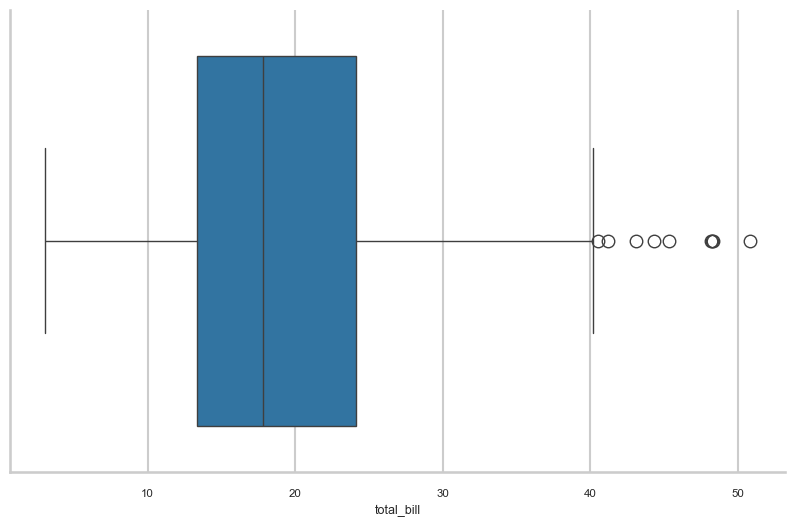

count    244.000000
mean      19.785943
std        8.902412
min        3.070000
25%       13.347500
50%       17.795000
75%       24.127500
max       50.810000
Name: total_bill, dtype: float64

In [48]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.boxplot(x=tips['total_bill'])
sns.despine()
plt.show()
tips['total_bill'].describe()

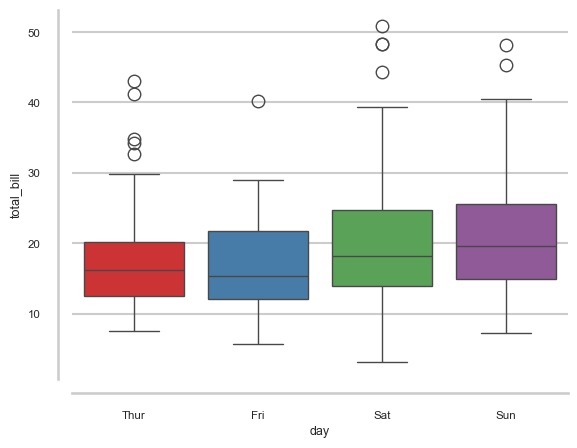

In [60]:
sns.boxplot(x="day", y="total_bill", data=tips, palette="Set1")
sns.despine(offset=10) # x,y축간의 간격을 설정
plt.show()

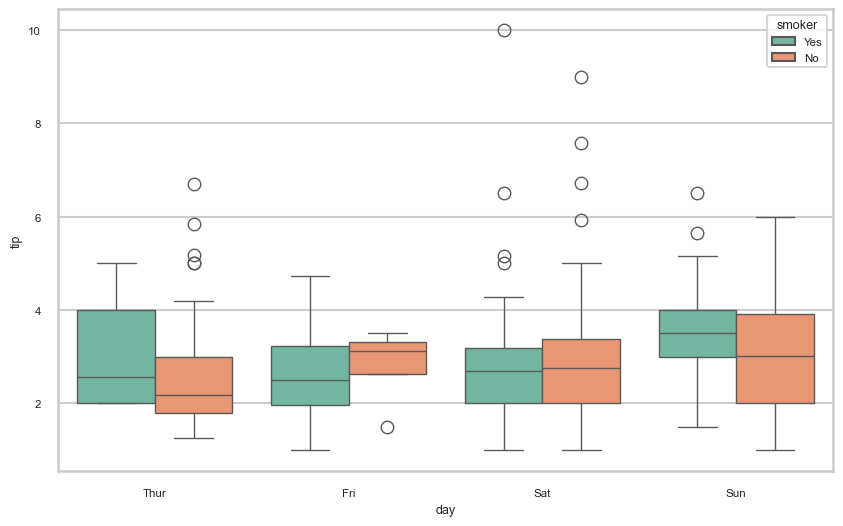

In [61]:
#hue 인수 : 카테고리값을 가지는 변수의 이름 지정하면
#카테고리에 따라 그룹을 만들어서 표시
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='tip', hue='smoker', data=tips, palette='Set2')
plt.show()

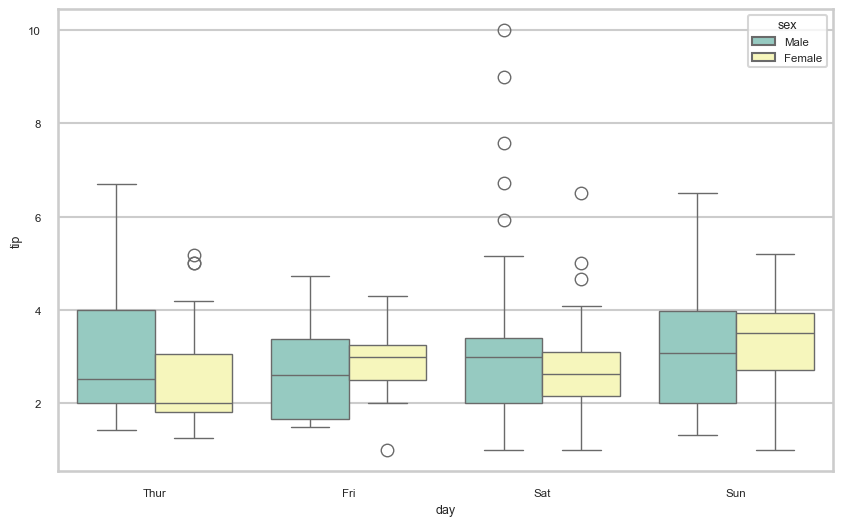

In [59]:
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='tip', hue='sex', data=tips, palette='Set3')
plt.show()

### Swarm Plot
- 데이터 포인트 수와 함께 각 데이터의 분포도 제공

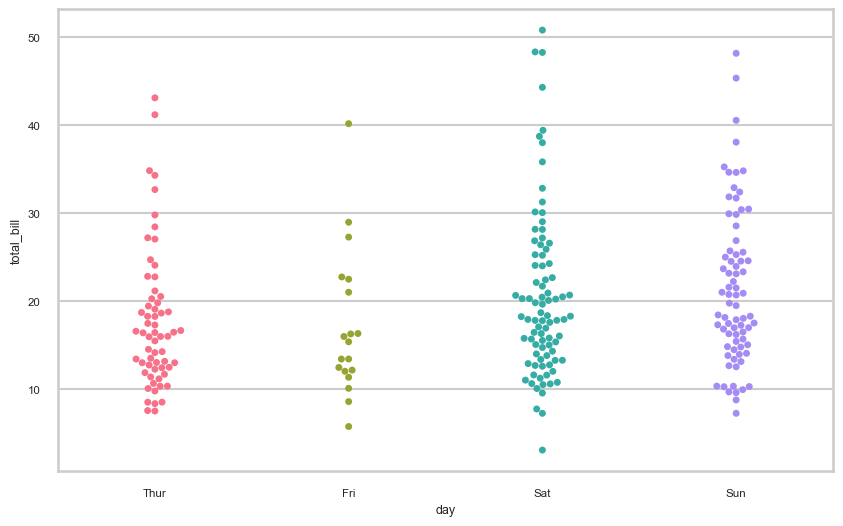

In [ ]:
# 데이터가 모여 있는 정도를 보여주는 plot : seaborn.swarmplot()
plt.figure(figsize=(10,6))
sns.swarmplot(x='day', y='total_bill', data=tips, palette='husl')
plt.show()

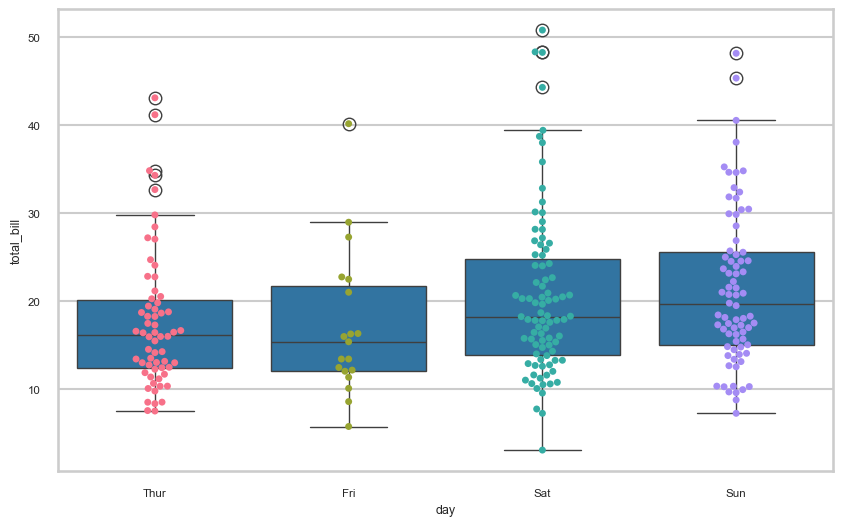

In [ ]:
# box plot과 swarmplot을 같이 사용하는 예제
plt.figure(figsize=(10,6))
sns.boxplot(x='day', y='total_bill', data=tips)
sns.swarmplot(x='day', y='total_bill', data=tips, palette='husl')
plt.show()

## seaborn.lmplot()
- 스캐터그래프를 그릴때 회귀선을 기본으로 출력해주는 그래프 함수
- size 인수 : 그래프 크기 (height 인수로 변경해서 사용하라는 메시지가 출력될 수 있음)
- hue 인수 : 카테고리 데이터를 분류하여 그룹화하되 하나의 그래프에 두개의 값을 모두 표현
- col 인수 : 카테고리 데이터를 분류하여 그룹화하되 그룹의 개수만큼 그래프를 생성해서 표현

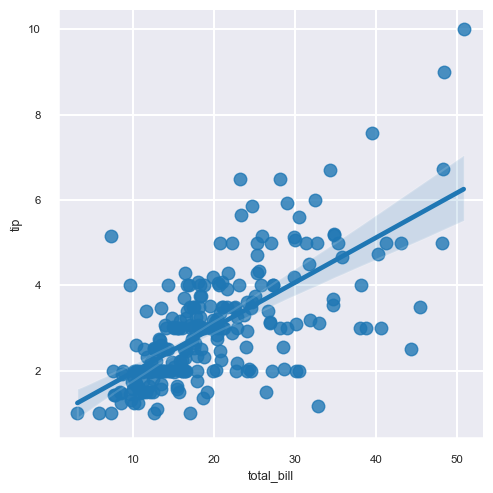

In [65]:
sns.set_style('darkgrid')
sns.lmplot(x='total_bill',y='tip', data=tips, height=5)
plt.show()

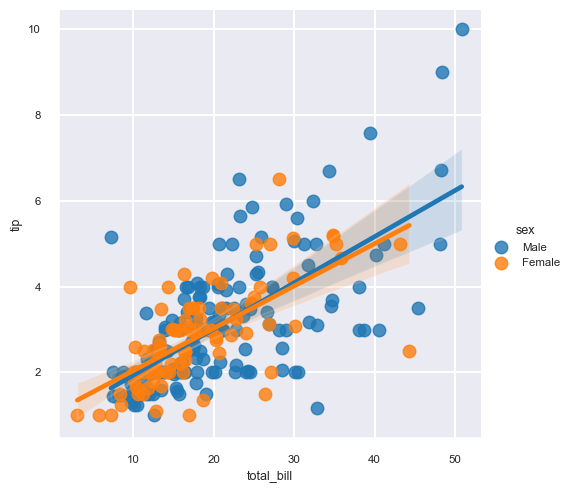

In [72]:
#hue는 그룹을 만듬
sns.lmplot(x='total_bill',y='tip', hue='sex', data=tips, height=5)
plt.show()

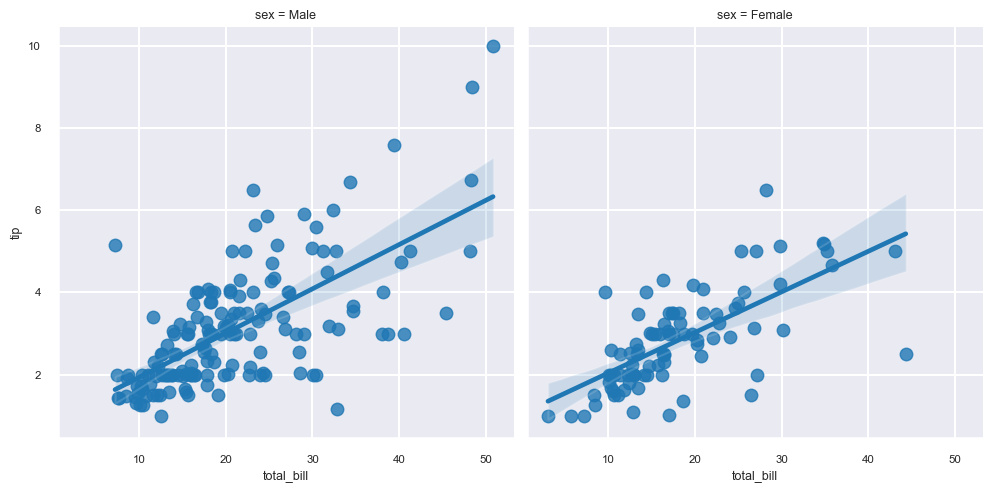

In [73]:
# 영수증 금액과 팁의 관계성을 lmplot()으로 표현하되, 성별을 구분해서 표현하되 그래프를 각각 그리시오.
# hue 인수 : 카테고리 데이터를 분류하여 그룹화하되 하나의 그래프에 두개의 값을 모두 표현
# col 인수 : 카테고리 데이터를 분류하여 그룹화하되 그룹의 개수만큼 그래프를 생성해서 표현
sns.lmplot(x='total_bill', y='tip', col='sex', data=tips, height=5)
plt.show()

## seaborn.heatmap()
- 열분포도, 2차원 수치 데이터를 색으로 표시
- 두개의 카테고리 값에 대한 값 변화를 한 눈에 알기 쉬움
- 대용량 데이터 시각화에도 사용성이 높음

<class 'pandas.core.frame.DataFrame'>


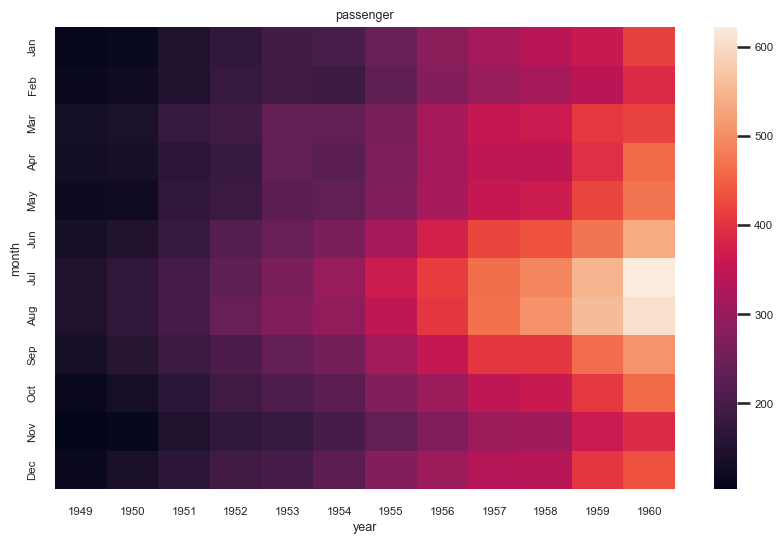

In [ ]:
# sns 패키지의 filghts data set 을 이용해서 heatmap 작성
flights = sns.load_dataset('flights')
print(type(flights))
flight_p = pd.pivot_table(flights, index='month', columns='year', values='passengers', fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(flight_p)
plt.title('passenger')
plt.show()

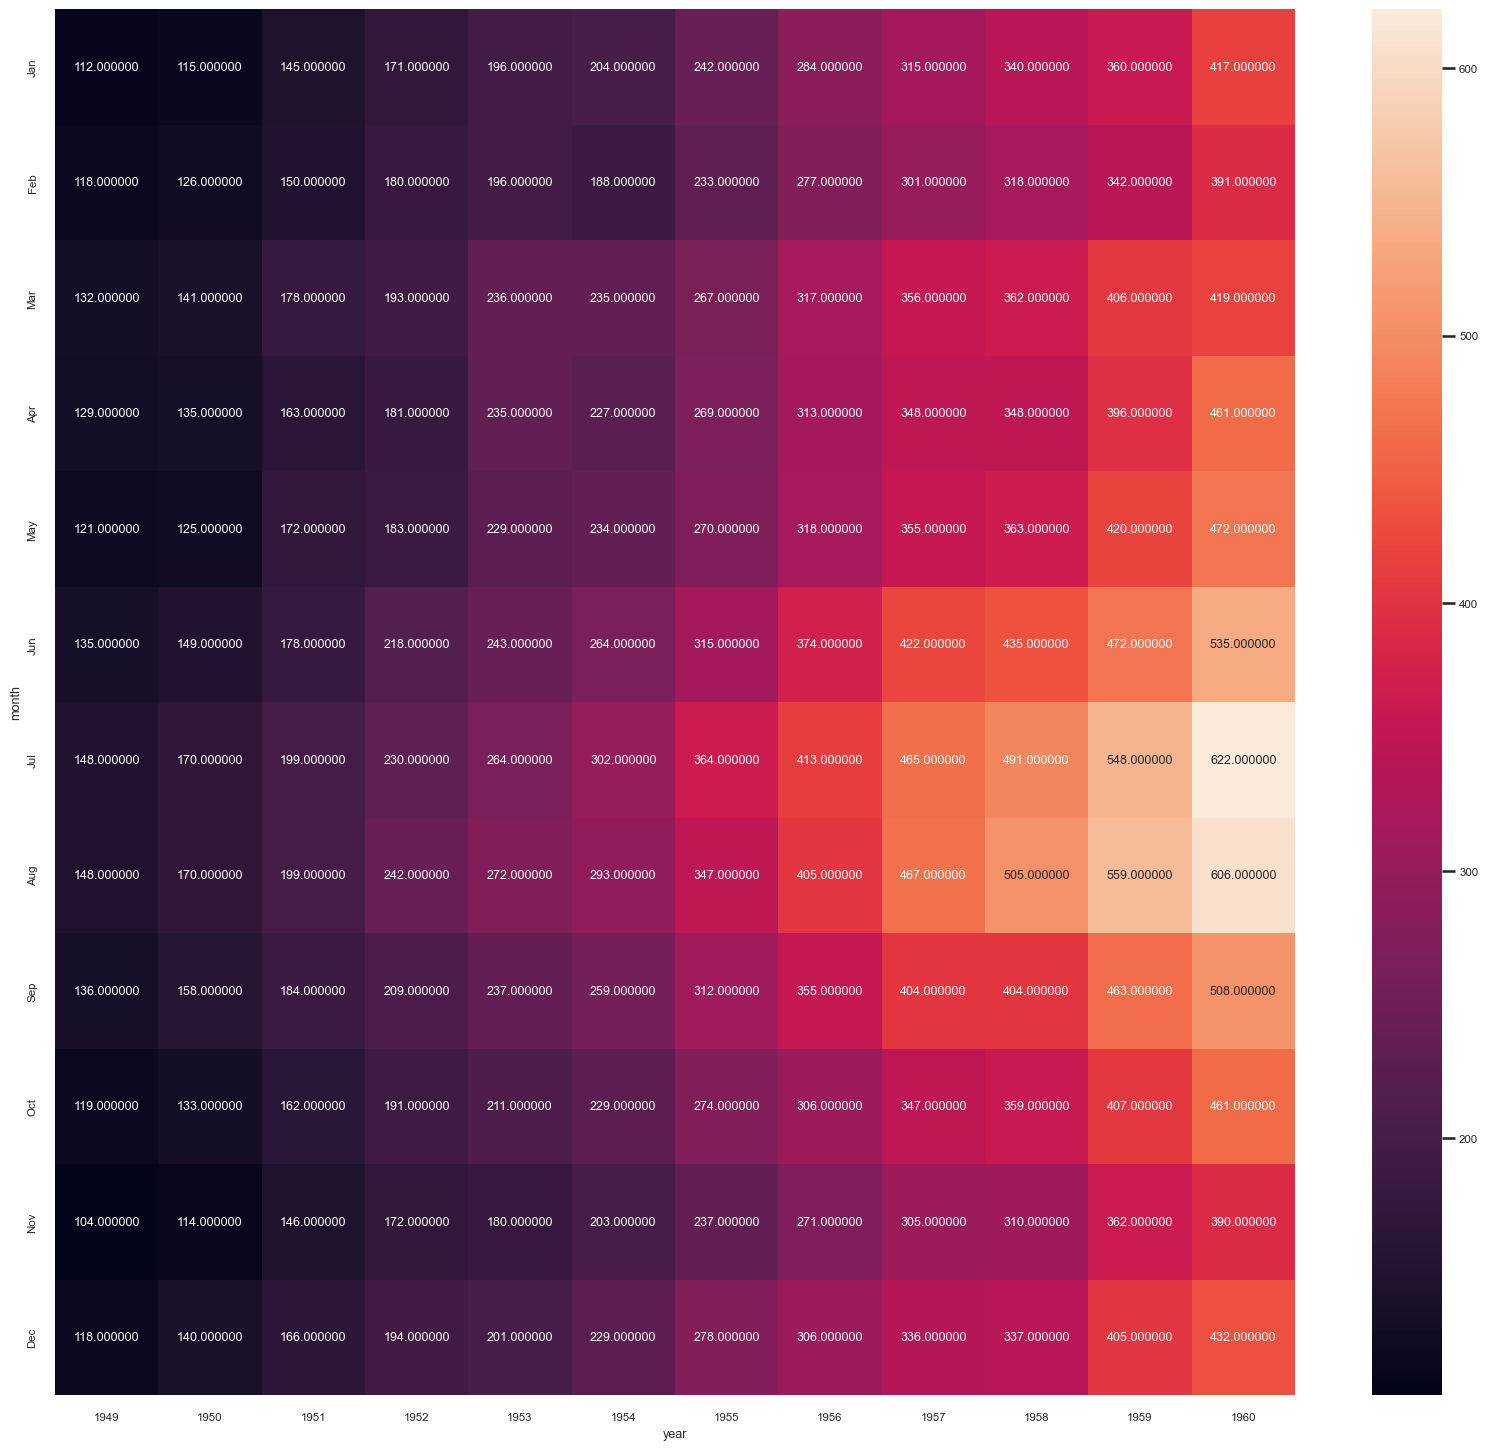

In [86]:
# 히트맵 그래프 위에 실제 데이터출력
# 사용인수 : annot=True, fmt=d/f - 출력데이터 형태
plt.figure(figsize=(20,18))
sns.heatmap(flight_p,annot=True,fmt='f')
plt.show()